In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("whitegrid")
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('data/Optimization.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Timestamp                    1000 non-null   object 
 1   Solar_Power_kW               1000 non-null   float64
 2   Wind_Power_kW                1000 non-null   float64
 3   Grid_Power_kW                1000 non-null   float64
 4   Battery_SoC_%                1000 non-null   float64
 5   SC_Charge_kW_x               1000 non-null   float64
 6   Hydrogen_Production_kg/h     1000 non-null   float64
 7   Load_Demand_kW               1000 non-null   float64
 8   Power_Supplied_kW            1000 non-null   float64
 9   Power_Loss_kW                1000 non-null   float64
 10  Battery_Charge_kW            1000 non-null   float64
 11  Battery_Discharge_kW         1000 non-null   float64
 12  SC_Charge_kW_y               1000 non-null   float64
 13  SC_Discharge_kW    

In [5]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [6]:
df.head()

,Timestamp,Solar_Power_kW,Wind_Power_kW,Grid_Power_kW,Battery_SoC_%,SC_Charge_kW_x,Hydrogen_Production_kg/h,Load_Demand_kW,Power_Supplied_kW,Power_Loss_kW,Battery_Charge_kW,Battery_Discharge_kW,SC_Charge_kW_y,SC_Discharge_kW,hour,Electricity_Price_USDperkWh,Grid_Status,SC_Energy_kWh_raw,Optimization_Level
0,2024-04-01 00:00:00,18.727006,7.405317,8.925585,73.816240,5.719959,1.968178,62.412848,62.218850,0.193997,22.483571,21.996777,3.649643,0.184385,0,0.1,1,0.000000,High Efficiency
1,2024-04-01 01:00:00,47.535715,21.676038,8.704682,83.734512,8.054323,2.367178,38.619318,37.685455,0.933863,19.308678,19.623168,4.710963,2.279230,1,0.1,1,0.040529,High Efficiency
2,2024-04-01 02:00:00,36.599697,34.917833,18.593819,40.037432,7.601609,4.272737,73.619728,69.463499,4.156229,23.238443,15.298152,3.415160,3.172789,2,0.1,1,0.044568,Moderate Efficiency
3,2024-04-01 03:00:00,29.932924,29.288995,8.743193,69.989928,1.538999,1.700022,60.655812,56.821970,3.833842,27.615149,11.765316,4.384077,7.775375,3,0.1,1,0.000000,Moderate Efficiency
4,2024-04-01 04:00:00,7.800932,32.262446,9.079246,65.739679,1.492495,4.348248,37.860194,36.106981,1.753213,18.829233,18.491117,1.212771,5.113106,4,0.1,1,0.000000,High Efficiency


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Timestamp                    1000 non-null   datetime64[ns]
 1   Solar_Power_kW               1000 non-null   float64       
 2   Wind_Power_kW                1000 non-null   float64       
 3   Grid_Power_kW                1000 non-null   float64       
 4   Battery_SoC_%                1000 non-null   float64       
 5   SC_Charge_kW_x               1000 non-null   float64       
 6   Hydrogen_Production_kg/h     1000 non-null   float64       
 7   Load_Demand_kW               1000 non-null   float64       
 8   Power_Supplied_kW            1000 non-null   float64       
 9   Power_Loss_kW                1000 non-null   float64       
 10  Battery_Charge_kW            1000 non-null   float64       
 11  Battery_Discharge_kW         1000 non-null  

In [8]:
df.hour.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [9]:
df.describe()

,Timestamp,Solar_Power_kW,Wind_Power_kW,Grid_Power_kW,Battery_SoC_%,SC_Charge_kW_x,Hydrogen_Production_kg/h,Load_Demand_kW,Power_Supplied_kW,Power_Loss_kW,Battery_Charge_kW,Battery_Discharge_kW,SC_Charge_kW_y,SC_Discharge_kW,hour,Electricity_Price_USDperkWh,Grid_Status,SC_Energy_kWh_raw
count,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2024-04-21 19:29:59.999999744,24.512828,20.280692,12.536086,59.230004,4.941053,2.492322,54.665442,52.253589,2.411853,20.096660,15.354181,5.007760,3.977547,11.436000,0.191500,0.960000,8.467422
min,2024-04-01 00:00:00,0.231601,0.128731,5.000175,20.052271,0.000307,0.030919,30.071417,26.384289,0.001205,3.793663,0.298057,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000
25%,2024-04-11 09:45:00,11.798663,9.642971,8.920265,39.352062,2.449740,1.246900,42.011083,39.522335,1.179946,16.762048,11.968792,3.704001,2.525159,5.000000,0.100000,1.000000,4.400002
50%,2024-04-21 19:30:00,24.840369,20.749356,12.509209,58.742343,4.945981,2.452014,54.232151,52.183199,2.419953,20.126503,15.315386,4.999498,4.000369,11.000000,0.200000,1.000000,8.282425
75%,2024-05-02 05:15:00,37.215979,30.418602,16.386553,79.003265,7.399935,3.699259,67.823217,65.169327,3.572331,23.239719,18.644411,6.321831,5.333891,17.000000,0.300000,1.000000,12.706031
max,2024-05-12 15:00:00,49.985884,39.976549,19.967313,99.964616,9.977494,4.996752,79.973034,79.127117,4.994523,39.263657,30.965538,10.000000,10.000000,23.000000,0.300000,1.000000,17.230988
std,NaN,14.606868,11.687596,4.360113,22.919148,2.868099,1.445974,14.486682,14.502363,1.424572,4.896080,4.987272,1.936939,2.016843,6.913009,0.086169,0.196057,4.932074


In [10]:
# Create new time-based features
df['day_name'] = df['Timestamp'].dt.day_name()
df['month_name'] = df['Timestamp'].dt.month_name()

# Set the 'Timestamp' as the index for easier time-series plotting
df.set_index('Timestamp', inplace=True)

In [11]:
df.head()

,Solar_Power_kW,Wind_Power_kW,Grid_Power_kW,Battery_SoC_%,SC_Charge_kW_x,Hydrogen_Production_kg/h,Load_Demand_kW,Power_Supplied_kW,Power_Loss_kW,Battery_Charge_kW,Battery_Discharge_kW,SC_Charge_kW_y,SC_Discharge_kW,hour,Electricity_Price_USDperkWh,Grid_Status,SC_Energy_kWh_raw,Optimization_Level,day_name,month_name
Timestamp,,,,,,,,,,,,,,,,,,,,
2024-04-01 00:00:00,18.727006,7.405317,8.925585,73.816240,5.719959,1.968178,62.412848,62.218850,0.193997,22.483571,21.996777,3.649643,0.184385,0,0.1,1,0.000000,High Efficiency,Monday,April
2024-04-01 01:00:00,47.535715,21.676038,8.704682,83.734512,8.054323,2.367178,38.619318,37.685455,0.933863,19.308678,19.623168,4.710963,2.279230,1,0.1,1,0.040529,High Efficiency,Monday,April
2024-04-01 02:00:00,36.599697,34.917833,18.593819,40.037432,7.601609,4.272737,73.619728,69.463499,4.156229,23.238443,15.298152,3.415160,3.172789,2,0.1,1,0.044568,Moderate Efficiency,Monday,April
2024-04-01 03:00:00,29.932924,29.288995,8.743193,69.989928,1.538999,1.700022,60.655812,56.821970,3.833842,27.615149,11.765316,4.384077,7.775375,3,0.1,1,0.000000,Moderate Efficiency,Monday,April
2024-04-01 04:00:00,7.800932,32.262446,9.079246,65.739679,1.492495,4.348248,37.860194,36.106981,1.753213,18.829233,18.491117,1.212771,5.113106,4,0.1,1,0.000000,High Efficiency,Monday,April


<Axes: title={'center': 'Frequency of Hours'}, xlabel='Hour', ylabel='Count'>

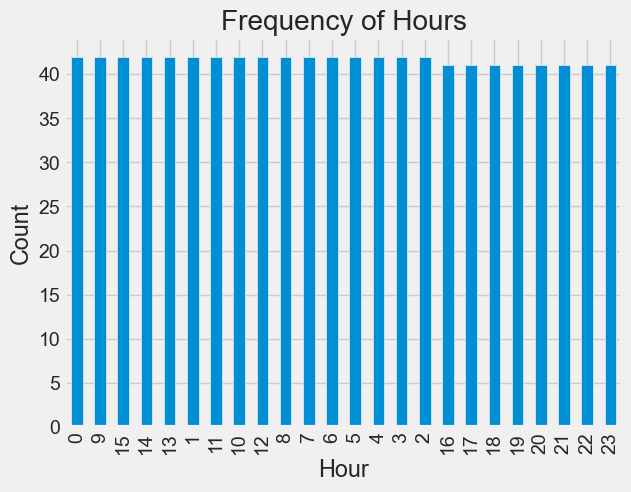

In [12]:
df.hour.value_counts().plot(kind='bar', xlabel='Hour', ylabel='Count', title='Frequency of Hours')

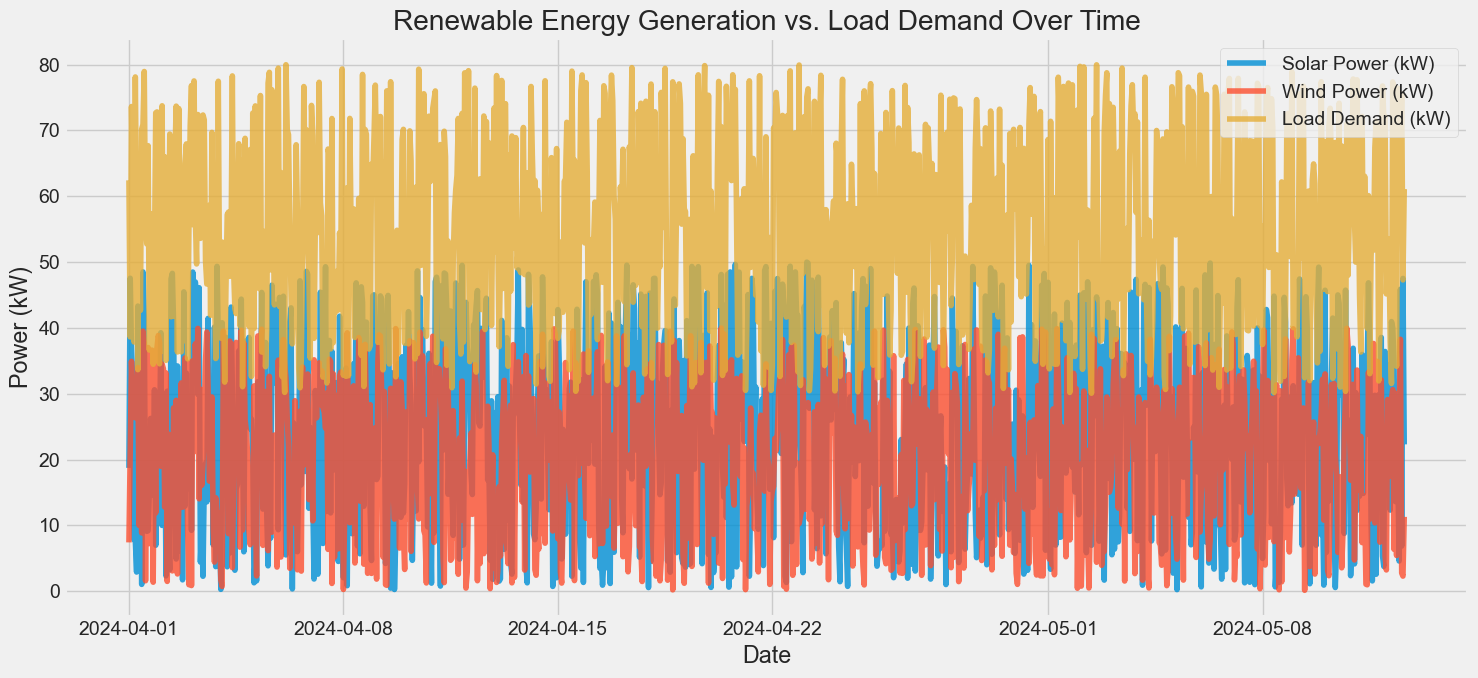

In [13]:
# Graph 1: Time-series plot of Renewable Energy and Load Demand
plt.figure(figsize=(15, 7))
plt.plot(df.index, df['Solar_Power_kW'], label='Solar Power (kW)', alpha=0.8)
plt.plot(df.index, df['Wind_Power_kW'], label='Wind Power (kW)', alpha=0.8)
plt.plot(df.index, df['Load_Demand_kW'], label='Load Demand (kW)', alpha=0.8)
plt.title('Renewable Energy Generation vs. Load Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Power (kW)')
plt.legend()
plt.tight_layout()
#lt.savefig('images/renewable_load_demand_timeseries.png')
plt.show()

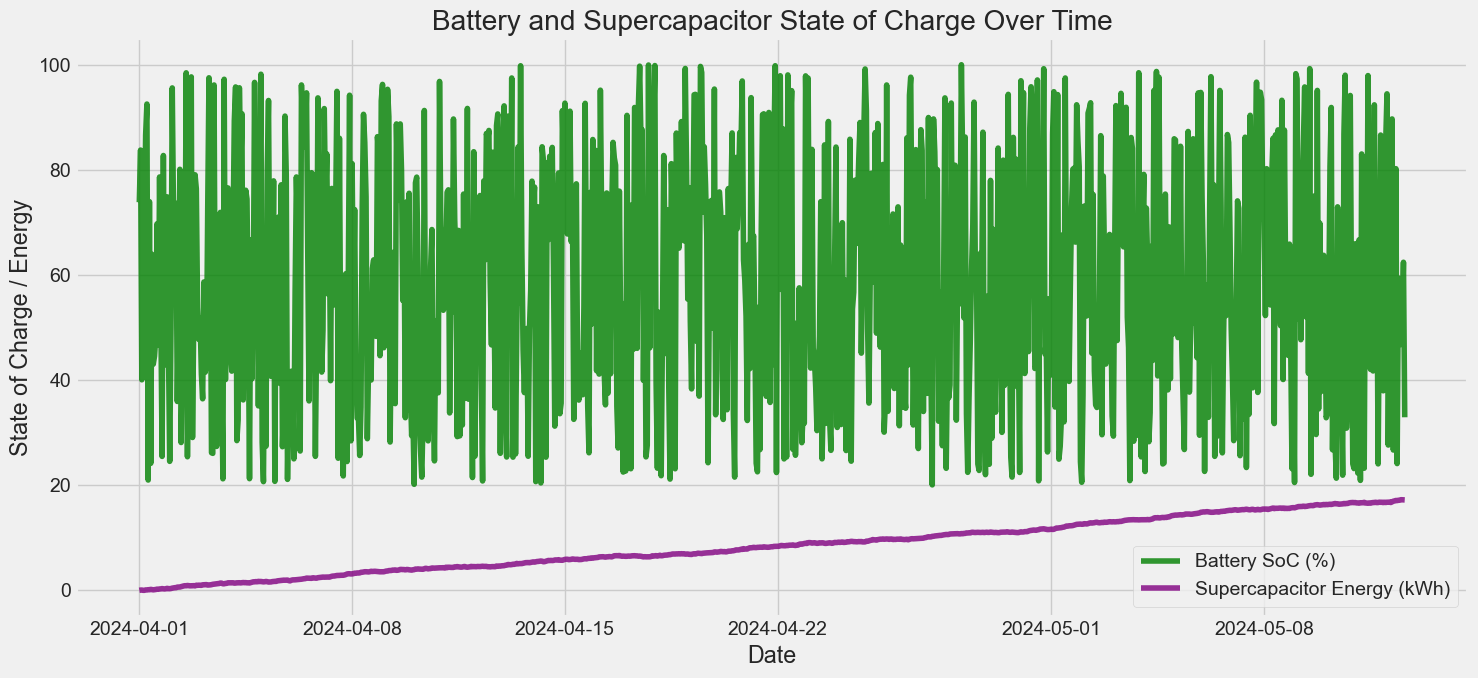

In [14]:
plt.figure(figsize=(15, 7))
plt.plot(df.index, df['Battery_SoC_%'], label='Battery SoC (%)', color='green', alpha=0.8)
# df.columns.get_loc('SC_Energy_kWh_raw') is not needed here
plt.plot(df.index, df['SC_Energy_kWh_raw'], label='Supercapacitor Energy (kWh)', color='purple', alpha=0.8)
plt.title('Battery and Supercapacitor State of Charge Over Time')
plt.xlabel('Date')
plt.ylabel('State of Charge / Energy')
plt.legend()
plt.tight_layout()
plt.savefig('images/storage_soc_timeseries.png')
plt.show()

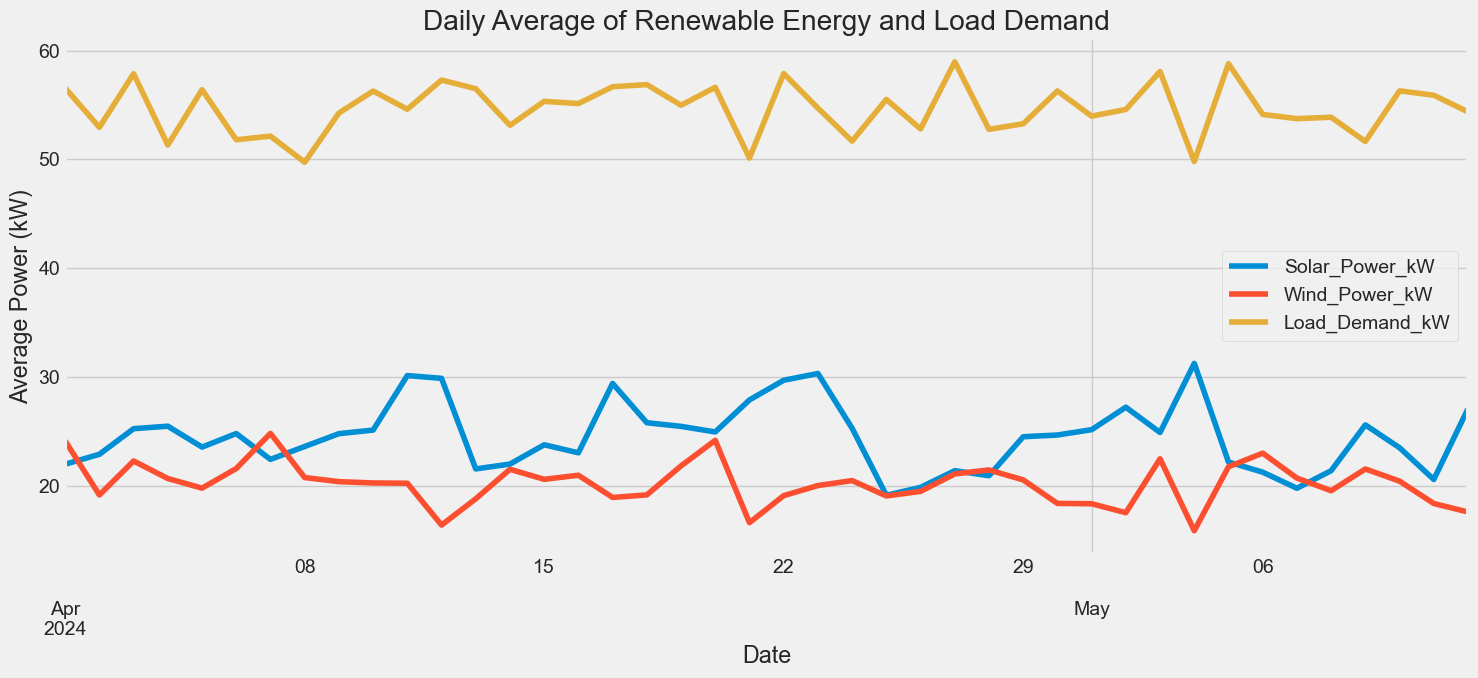

In [15]:
# Graph 3: Daily Average Load Demand and Renewable Energy
daily_avg = df[['Solar_Power_kW', 'Wind_Power_kW', 'Load_Demand_kW']].resample('D').mean()
daily_avg.plot(figsize=(15, 7), title='Daily Average of Renewable Energy and Load Demand')
plt.xlabel('Date')
plt.ylabel('Average Power (kW)')
plt.tight_layout()
#plt.savefig('images/daily_avg_renewable_load.png')
plt.show()

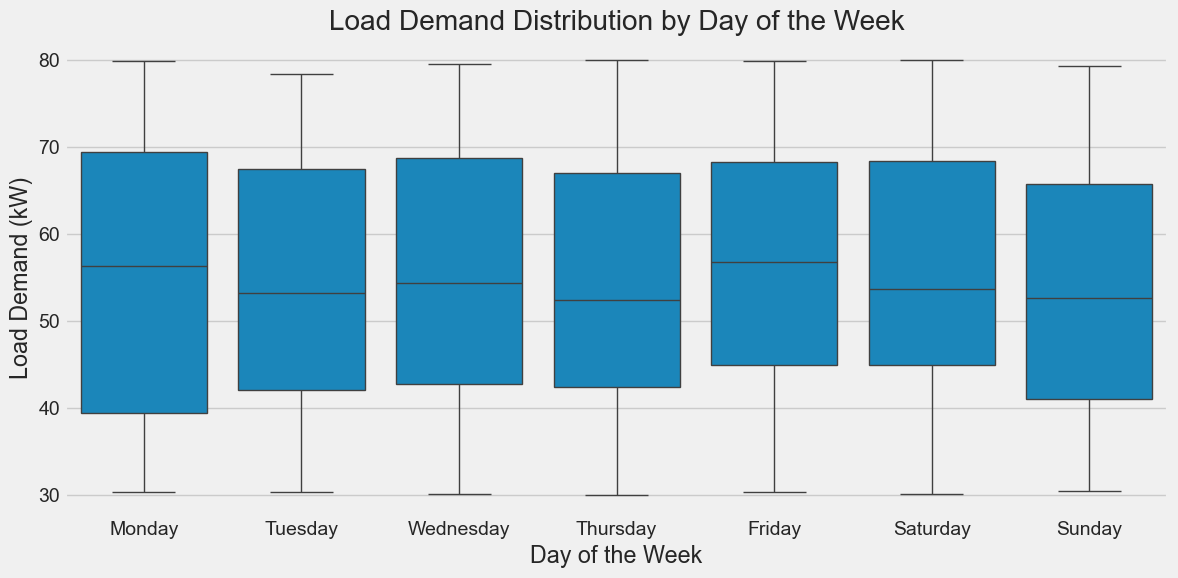

In [16]:
# Graph 4: Box plot of Load Demand by Day of the Week
plt.figure(figsize=(12, 6))
sns.boxplot(x='day_name', y='Load_Demand_kW', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Load Demand Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Load Demand (kW)')
plt.tight_layout()
#plt.savefig('images/load_demand_by_day_boxplot.png')
plt.show()


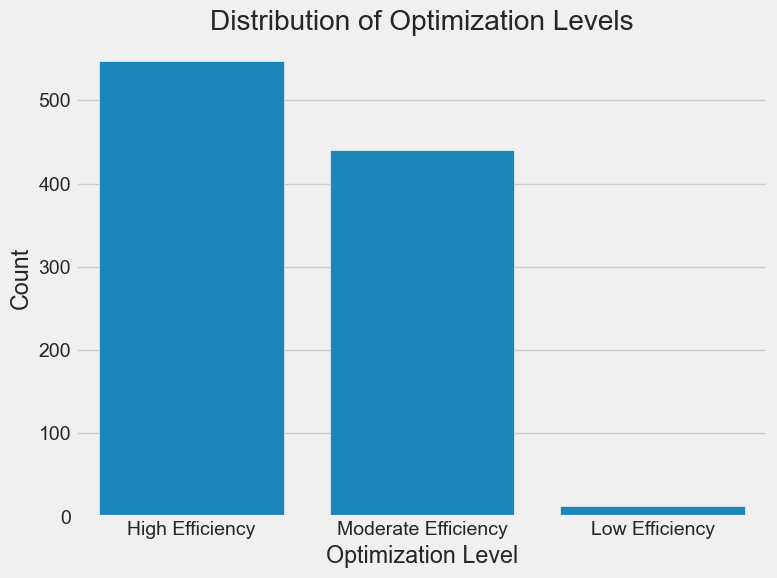

In [17]:
# Graph 5: Distribution of Optimization Levels
plt.figure(figsize=(8, 6))
sns.countplot(x='Optimization_Level', data=df)
plt.title('Distribution of Optimization Levels')
plt.xlabel('Optimization Level')
plt.ylabel('Count')
plt.tight_layout()
#plt.savefig('images/optimization_level_distribution.png')
plt.show()


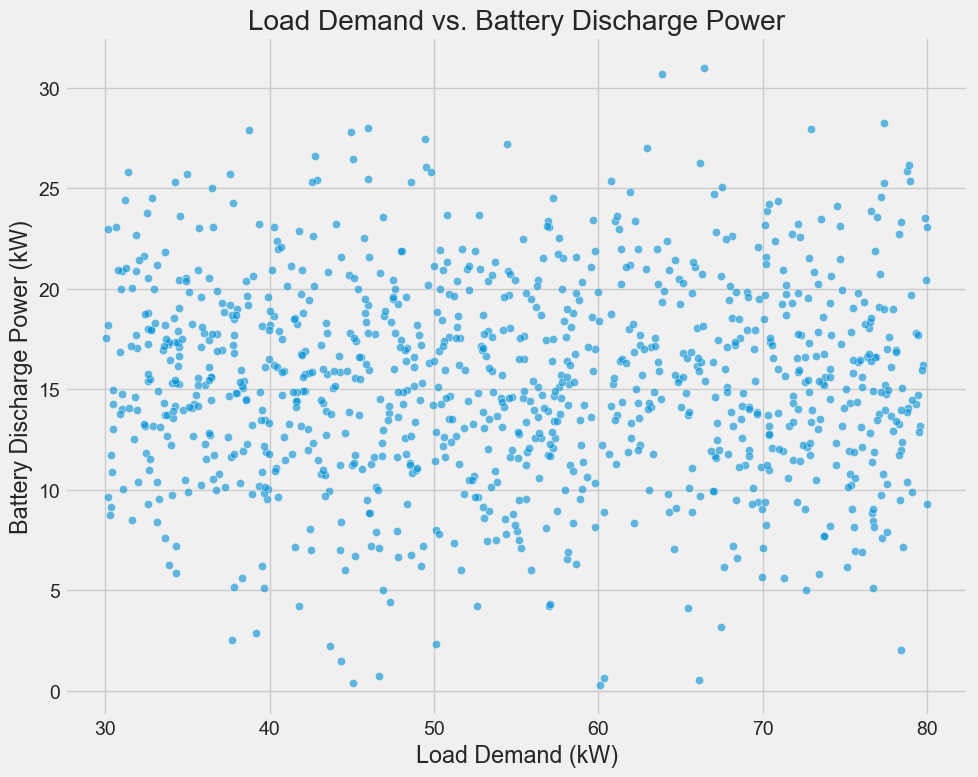

In [18]:
# Graph 6: Relationship between Load Demand and Battery Discharge
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Load_Demand_kW', y='Battery_Discharge_kW', data=df, alpha=0.6)
plt.title('Load Demand vs. Battery Discharge Power')
plt.xlabel('Load Demand (kW)')
plt.ylabel('Battery Discharge Power (kW)')
plt.tight_layout()
#plt.savefig('images/load_demand_vs_battery_discharge_scatter.png')
plt.show()

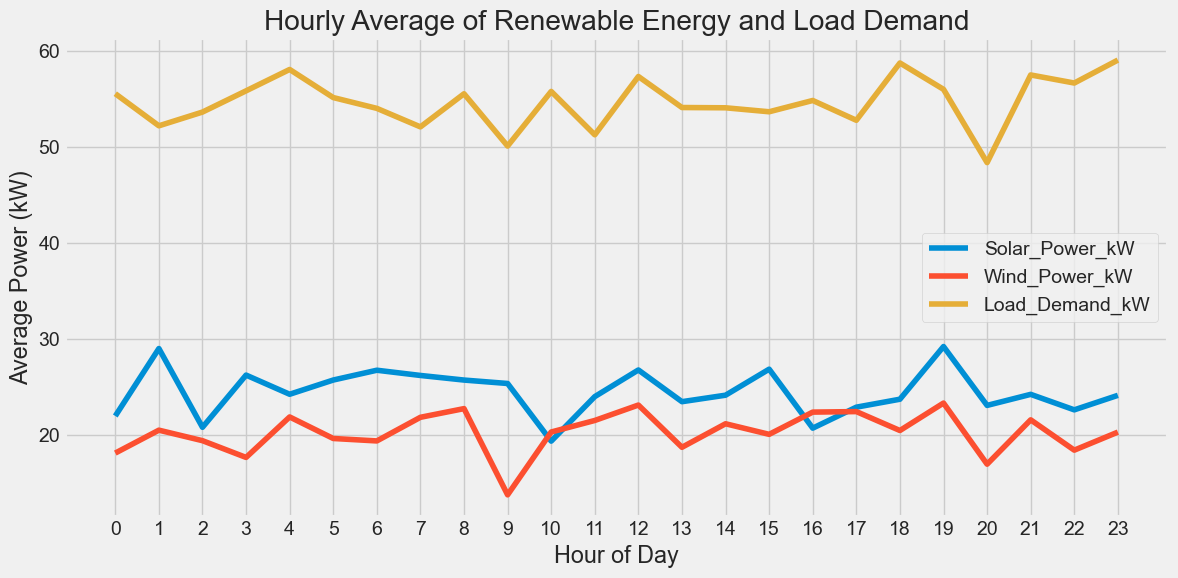

In [19]:
# Graph 7: Hourly patterns of Solar, Wind, and Load
hourly_avg = df[['Solar_Power_kW', 'Wind_Power_kW', 'Load_Demand_kW']].groupby(df['hour']).mean()
hourly_avg.plot(figsize=(12, 6), title='Hourly Average of Renewable Energy and Load Demand')
plt.xlabel('Hour of Day')
plt.ylabel('Average Power (kW)')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.savefig('images/hourly_patterns.png')
plt.show()

# Feature Engineering

In [21]:
df['Combined_Renewable_kW'] = df['Solar_Power_kW'] + df['Wind_Power_kW']
df['Power_Deficit_kW'] = df['Load_Demand_kW'] - df['Combined_Renewable_kW']

In [22]:
df.head()

,Solar_Power_kW,Wind_Power_kW,Grid_Power_kW,Battery_SoC_%,SC_Charge_kW_x,Hydrogen_Production_kg/h,Load_Demand_kW,Power_Supplied_kW,Power_Loss_kW,Battery_Charge_kW,...,SC_Discharge_kW,hour,Electricity_Price_USDperkWh,Grid_Status,SC_Energy_kWh_raw,Optimization_Level,day_name,month_name,Combined_Renewable_kW,Power_Deficit_kW
Timestamp,,,,,,,,,,,,,,,,,,,,,
2024-04-01 00:00:00,18.727006,7.405317,8.925585,73.816240,5.719959,1.968178,62.412848,62.218850,0.193997,22.483571,...,0.184385,0,0.1,1,0.000000,High Efficiency,Monday,April,26.132323,36.280525
2024-04-01 01:00:00,47.535715,21.676038,8.704682,83.734512,8.054323,2.367178,38.619318,37.685455,0.933863,19.308678,...,2.279230,1,0.1,1,0.040529,High Efficiency,Monday,April,69.211753,-30.592435
2024-04-01 02:00:00,36.599697,34.917833,18.593819,40.037432,7.601609,4.272737,73.619728,69.463499,4.156229,23.238443,...,3.172789,2,0.1,1,0.044568,Moderate Efficiency,Monday,April,71.517531,2.102198
2024-04-01 03:00:00,29.932924,29.288995,8.743193,69.989928,1.538999,1.700022,60.655812,56.821970,3.833842,27.615149,...,7.775375,3,0.1,1,0.000000,Moderate Efficiency,Monday,April,59.221920,1.433892
2024-04-01 04:00:00,7.800932,32.262446,9.079246,65.739679,1.492495,4.348248,37.860194,36.106981,1.753213,18.829233,...,5.113106,4,0.1,1,0.000000,High Efficiency,Monday,April,40.063378,-2.203184


In [23]:
daily_deficit = df[df['Power_Deficit_kW'] > 0]['Power_Deficit_kW'].resample('D').sum()
daily_deficit.sort_values()

Timestamp
2024-05-04    208.841133
2024-05-12    229.147723
2024-04-23    239.973650
2024-05-09    245.161510
2024-04-11    247.940265
2024-04-04    259.036365
2024-04-21    262.245800
2024-04-07    265.709540
2024-04-24    268.268344
2024-04-08    272.489484
2024-04-20    306.418139
2024-04-17    333.944167
2024-05-02    336.164885
2024-04-28    337.887567
2024-04-29    343.691334
2024-04-22    347.020409
2024-04-06    354.857567
2024-04-19    355.630319
2024-04-10    371.294534
2024-04-15    371.635453
2024-04-09    371.904654
2024-04-14    377.804550
2024-05-03    380.776020
2024-04-03    382.208604
2024-05-06    386.325169
2024-04-01    386.691490
2024-04-18    392.441340
2024-04-26    395.344769
2024-04-12    397.162755
2024-05-01    405.579592
2024-05-08    405.755060
2024-04-30    408.515395
2024-05-07    409.119089
2024-04-02    415.024604
2024-05-10    423.022120
2024-04-05    437.347805
2024-05-05    440.194268
2024-04-13    450.603767
2024-04-16    459.886824
2024-04-27    4

In [24]:
avg_daily_deficit = daily_deficit.mean()
max_daily_deficit = daily_deficit.max()

In [25]:
avg_daily_deficit

360.9274310651725

In [26]:
df['Load_Demand_Rate_of_Change'] = df['Load_Demand_kW'].diff().abs()
df['Solar_Power_Rate_of_Change'] = df['Solar_Power_kW'].diff().abs()
df['Wind_Power_Rate_of_Change'] = df['Wind_Power_kW'].diff().abs()

In [27]:
df.head()

,Solar_Power_kW,Wind_Power_kW,Grid_Power_kW,Battery_SoC_%,SC_Charge_kW_x,Hydrogen_Production_kg/h,Load_Demand_kW,Power_Supplied_kW,Power_Loss_kW,Battery_Charge_kW,...,Grid_Status,SC_Energy_kWh_raw,Optimization_Level,day_name,month_name,Combined_Renewable_kW,Power_Deficit_kW,Load_Demand_Rate_of_Change,Solar_Power_Rate_of_Change,Wind_Power_Rate_of_Change
Timestamp,,,,,,,,,,,,,,,,,,,,,
2024-04-01 00:00:00,18.727006,7.405317,8.925585,73.816240,5.719959,1.968178,62.412848,62.218850,0.193997,22.483571,...,1,0.000000,High Efficiency,Monday,April,26.132323,36.280525,NaN,NaN,NaN
2024-04-01 01:00:00,47.535715,21.676038,8.704682,83.734512,8.054323,2.367178,38.619318,37.685455,0.933863,19.308678,...,1,0.040529,High Efficiency,Monday,April,69.211753,-30.592435,23.793530,28.808709,14.270721
2024-04-01 02:00:00,36.599697,34.917833,18.593819,40.037432,7.601609,4.272737,73.619728,69.463499,4.156229,23.238443,...,1,0.044568,Moderate Efficiency,Monday,April,71.517531,2.102198,35.000410,10.936018,13.241796
2024-04-01 03:00:00,29.932924,29.288995,8.743193,69.989928,1.538999,1.700022,60.655812,56.821970,3.833842,27.615149,...,1,0.000000,Moderate Efficiency,Monday,April,59.221920,1.433892,12.963916,6.666773,5.628838
2024-04-01 04:00:00,7.800932,32.262446,9.079246,65.739679,1.492495,4.348248,37.860194,36.106981,1.753213,18.829233,...,1,0.000000,High Efficiency,Monday,April,40.063378,-2.203184,22.795618,22.131992,2.973450


In [28]:
df.iloc[0] = df.iloc[0].fillna(0)

In [29]:
df.head()

,Solar_Power_kW,Wind_Power_kW,Grid_Power_kW,Battery_SoC_%,SC_Charge_kW_x,Hydrogen_Production_kg/h,Load_Demand_kW,Power_Supplied_kW,Power_Loss_kW,Battery_Charge_kW,...,Grid_Status,SC_Energy_kWh_raw,Optimization_Level,day_name,month_name,Combined_Renewable_kW,Power_Deficit_kW,Load_Demand_Rate_of_Change,Solar_Power_Rate_of_Change,Wind_Power_Rate_of_Change
Timestamp,,,,,,,,,,,,,,,,,,,,,
2024-04-01 00:00:00,18.727006,7.405317,8.925585,73.816240,5.719959,1.968178,62.412848,62.218850,0.193997,22.483571,...,1,0.000000,High Efficiency,Monday,April,26.132323,36.280525,0.000000,0.000000,0.000000
2024-04-01 01:00:00,47.535715,21.676038,8.704682,83.734512,8.054323,2.367178,38.619318,37.685455,0.933863,19.308678,...,1,0.040529,High Efficiency,Monday,April,69.211753,-30.592435,23.793530,28.808709,14.270721
2024-04-01 02:00:00,36.599697,34.917833,18.593819,40.037432,7.601609,4.272737,73.619728,69.463499,4.156229,23.238443,...,1,0.044568,Moderate Efficiency,Monday,April,71.517531,2.102198,35.000410,10.936018,13.241796
2024-04-01 03:00:00,29.932924,29.288995,8.743193,69.989928,1.538999,1.700022,60.655812,56.821970,3.833842,27.615149,...,1,0.000000,Moderate Efficiency,Monday,April,59.221920,1.433892,12.963916,6.666773,5.628838
2024-04-01 04:00:00,7.800932,32.262446,9.079246,65.739679,1.492495,4.348248,37.860194,36.106981,1.753213,18.829233,...,1,0.000000,High Efficiency,Monday,April,40.063378,-2.203184,22.795618,22.131992,2.973450


In [30]:
max_load_fluctuation = df['Load_Demand_Rate_of_Change'].max()
max_solar_fluctuation = df['Solar_Power_Rate_of_Change'].max()
max_wind_fluctuation = df['Wind_Power_Rate_of_Change'].max()

In [31]:
# Print the results for HESS design decisions
print(f"Average Daily Energy Deficit (kWh): {avg_daily_deficit:.2f}")
print(f"Maximum Daily Energy Deficit (kWh): {max_daily_deficit:.2f}")
print("-" * 50)
print(f"Maximum Load Fluctuation (kW/hour): {max_load_fluctuation:.2f}")
print(f"Maximum Solar Fluctuation (kW/hour): {max_solar_fluctuation:.2f}")
print(f"Maximum Wind Fluctuation (kW/hour): {max_wind_fluctuation:.2f}")

Average Daily Energy Deficit (kWh): 360.93
Maximum Daily Energy Deficit (kWh): 497.70
--------------------------------------------------
Maximum Load Fluctuation (kW/hour): 49.78
Maximum Solar Fluctuation (kW/hour): 47.89
Maximum Wind Fluctuation (kW/hour): 38.79


In [32]:
df.to_csv("data/final_hess.csv",index=True)

In [33]:
df =pd.read_csv("data/final_hess.csv")

In [34]:
df[["Optimization_Level","day_name","month_name"]]

,Optimization_Level,day_name,month_name
0,High Efficiency,Monday,April
1,High Efficiency,Monday,April
2,Moderate Efficiency,Monday,April
3,Moderate Efficiency,Monday,April
4,High Efficiency,Monday,April
...,...,...,...
995,High Efficiency,Sunday,May
996,High Efficiency,Sunday,May
997,High Efficiency,Sunday,May
998,Moderate Efficiency,Sunday,May


In [35]:
df.head()

,Timestamp,Solar_Power_kW,Wind_Power_kW,Grid_Power_kW,Battery_SoC_%,SC_Charge_kW_x,Hydrogen_Production_kg/h,Load_Demand_kW,Power_Supplied_kW,Power_Loss_kW,...,Grid_Status,SC_Energy_kWh_raw,Optimization_Level,day_name,month_name,Combined_Renewable_kW,Power_Deficit_kW,Load_Demand_Rate_of_Change,Solar_Power_Rate_of_Change,Wind_Power_Rate_of_Change
0,2024-04-01 00:00:00,18.727006,7.405317,8.925585,73.816240,5.719959,1.968178,62.412848,62.218850,0.193997,...,1,0.000000,High Efficiency,Monday,April,26.132323,36.280525,0.000000,0.000000,0.000000
1,2024-04-01 01:00:00,47.535715,21.676038,8.704682,83.734512,8.054323,2.367178,38.619318,37.685455,0.933863,...,1,0.040529,High Efficiency,Monday,April,69.211753,-30.592435,23.793530,28.808709,14.270721
2,2024-04-01 02:00:00,36.599697,34.917833,18.593819,40.037432,7.601609,4.272737,73.619728,69.463499,4.156229,...,1,0.044568,Moderate Efficiency,Monday,April,71.517531,2.102198,35.000410,10.936018,13.241796
3,2024-04-01 03:00:00,29.932924,29.288995,8.743193,69.989928,1.538999,1.700022,60.655812,56.821970,3.833842,...,1,0.000000,Moderate Efficiency,Monday,April,59.221920,1.433892,12.963916,6.666773,5.628838
4,2024-04-01 04:00:00,7.800932,32.262446,9.079246,65.739679,1.492495,4.348248,37.860194,36.106981,1.753213,...,1,0.000000,High Efficiency,Monday,April,40.063378,-2.203184,22.795618,22.131992,2.973450


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Timestamp                    1000 non-null   object 
 1   Solar_Power_kW               1000 non-null   float64
 2   Wind_Power_kW                1000 non-null   float64
 3   Grid_Power_kW                1000 non-null   float64
 4   Battery_SoC_%                1000 non-null   float64
 5   SC_Charge_kW_x               1000 non-null   float64
 6   Hydrogen_Production_kg/h     1000 non-null   float64
 7   Load_Demand_kW               1000 non-null   float64
 8   Power_Supplied_kW            1000 non-null   float64
 9   Power_Loss_kW                1000 non-null   float64
 10  Battery_Charge_kW            1000 non-null   float64
 11  Battery_Discharge_kW         1000 non-null   float64
 12  SC_Charge_kW_y               1000 non-null   float64
 13  SC_Discharge_kW    

In [37]:
df['Net_Power_kW'] = df['Solar_Power_kW'] + df['Wind_Power_kW'] - df['Load_Demand_kW']
# Convert 'hour' to cyclical features


In [38]:
print(np.sin(2 * np.pi * df['hour']/24))
#np.cos(2 * np.pi * df['hour']/24)

0      0.000000e+00
1      2.588190e-01
2      5.000000e-01
3      7.071068e-01
4      8.660254e-01
           ...     
995    2.588190e-01
996    1.224647e-16
997   -2.588190e-01
998   -5.000000e-01
999   -7.071068e-01
Name: hour, Length: 1000, dtype: float64


In [39]:

df['sin_hour'] = np.sin(2 * np.pi * df['hour']/24)
df['cos_hour'] = np.cos(2 * np.pi * df['hour']/24)

In [40]:
df.head()

,Timestamp,Solar_Power_kW,Wind_Power_kW,Grid_Power_kW,Battery_SoC_%,SC_Charge_kW_x,Hydrogen_Production_kg/h,Load_Demand_kW,Power_Supplied_kW,Power_Loss_kW,...,day_name,month_name,Combined_Renewable_kW,Power_Deficit_kW,Load_Demand_Rate_of_Change,Solar_Power_Rate_of_Change,Wind_Power_Rate_of_Change,Net_Power_kW,sin_hour,cos_hour
0,2024-04-01 00:00:00,18.727006,7.405317,8.925585,73.816240,5.719959,1.968178,62.412848,62.218850,0.193997,...,Monday,April,26.132323,36.280525,0.000000,0.000000,0.000000,-36.280525,0.000000,1.000000
1,2024-04-01 01:00:00,47.535715,21.676038,8.704682,83.734512,8.054323,2.367178,38.619318,37.685455,0.933863,...,Monday,April,69.211753,-30.592435,23.793530,28.808709,14.270721,30.592435,0.258819,0.965926
2,2024-04-01 02:00:00,36.599697,34.917833,18.593819,40.037432,7.601609,4.272737,73.619728,69.463499,4.156229,...,Monday,April,71.517531,2.102198,35.000410,10.936018,13.241796,-2.102198,0.500000,0.866025
3,2024-04-01 03:00:00,29.932924,29.288995,8.743193,69.989928,1.538999,1.700022,60.655812,56.821970,3.833842,...,Monday,April,59.221920,1.433892,12.963916,6.666773,5.628838,-1.433892,0.707107,0.707107
4,2024-04-01 04:00:00,7.800932,32.262446,9.079246,65.739679,1.492495,4.348248,37.860194,36.106981,1.753213,...,Monday,April,40.063378,-2.203184,22.795618,22.131992,2.973450,2.203184,0.866025,0.500000
